<a href="https://colab.research.google.com/github/PeGrn/3APIS/blob/main/TPNOTe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis")
result = sentiment_analysis("J'adore le NLP !")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9981306195259094}]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Corpus de documents
corpus = [
"Le NLP est fascinant.",
"Le NLP est utile dans de nombreux domaines.",
"Les applications du NLP sont vastes."
]
# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()
# Calculer la matrice TF-IDF
X = vectorizer.fit_transform(corpus)

print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18 stored elements and shape (3, 14)>
  Coords	Values
  (0, 7)	0.4804583972923858
  (0, 9)	0.3731188059313277
  (0, 5)	0.4804583972923858
  (0, 6)	0.6317450542765208
  (1, 7)	0.298173732156414
  (1, 9)	0.23155850231624595
  (1, 5)	0.298173732156414
  (1, 12)	0.3920626253314354
  (1, 1)	0.3920626253314354
  (1, 2)	0.3920626253314354
  (1, 10)	0.3920626253314354
  (1, 3)	0.3920626253314354
  (2, 9)	0.25537359879528915
  (2, 8)	0.4323850887896905
  (2, 0)	0.4323850887896905
  (2, 4)	0.4323850887896905
  (2, 11)	0.4323850887896905
  (2, 13)	0.4323850887896905


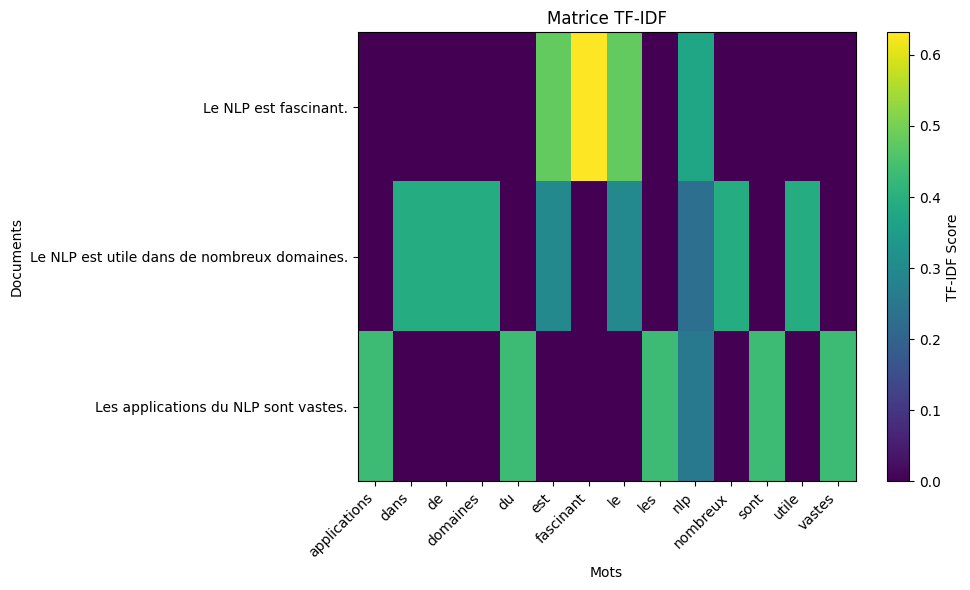

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus de documents
corpus = [
    "Le NLP est fascinant.",
    "Le NLP est utile dans de nombreux domaines.",
    "Les applications du NLP sont vastes."
]

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()

# Calculer la matrice TF-IDF
X = vectorizer.fit_transform(corpus)

# Convertir la matrice TF-IDF en DataFrame pour une meilleure visualisation
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Visualisation avec Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(df, cmap='viridis', aspect='auto')
plt.colorbar(label='TF-IDF Score')
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.yticks(range(len(corpus)), corpus)
plt.xlabel('Mots')
plt.ylabel('Documents')
plt.title('Matrice TF-IDF')
plt.tight_layout()
plt.show()

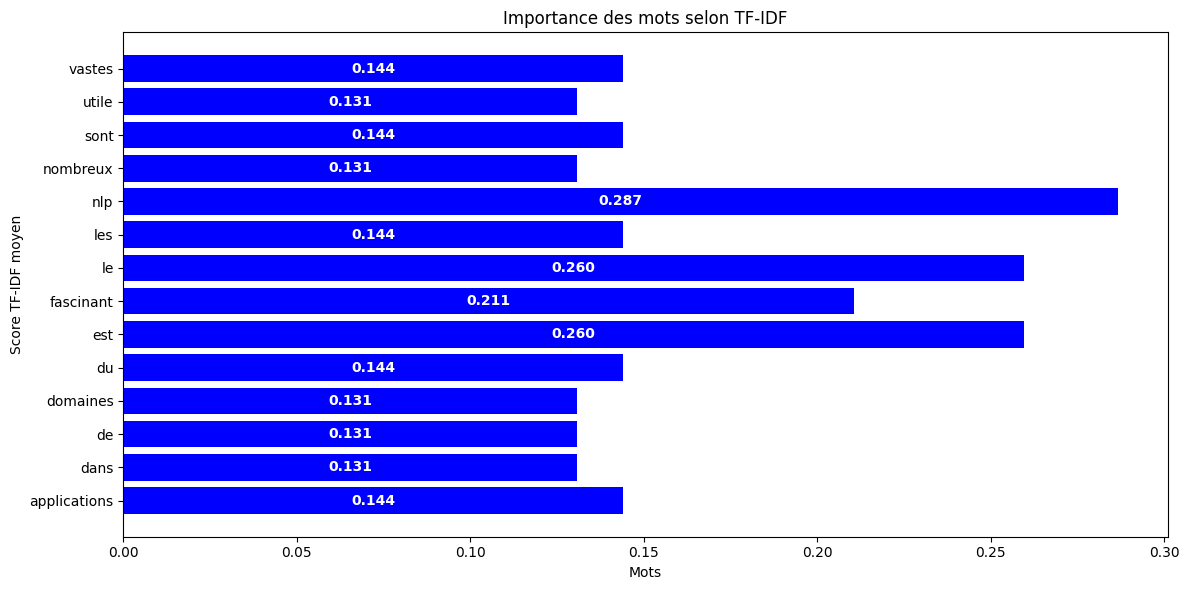

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus de documents
corpus = [
    "Le NLP est fascinant.",
    "Le NLP est utile dans de nombreux domaines.",
    "Les applications du NLP sont vastes."
]

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()

# Calculer la matrice TF-IDF
X = vectorizer.fit_transform(corpus)

# Convertir la matrice TF-IDF en DataFrame
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculer les scores TF-IDF moyens pour chaque mot
tfidf_means = df.mean()

# Créer le graphique
plt.figure(figsize=(12, 6))
bars = plt.barh(tfidf_means.index, tfidf_means.values, color='blue')  # Stocker les objets barres dans une variable

# Ajouter des étiquettes et un titre
plt.xlabel('Mots')
plt.ylabel('Score TF-IDF moyen')
plt.title('Importance des mots selon TF-IDF')

# Ajouter les valeurs des scores TF-IDF au-dessus de chaque barre
plt.bar_label(bars, fmt='%.3f',label_type="center",color="white",fontweight="bold")  # Affiche les valeurs avec 3 décimales

# Afficher le graphique
plt.tight_layout()
plt.show()

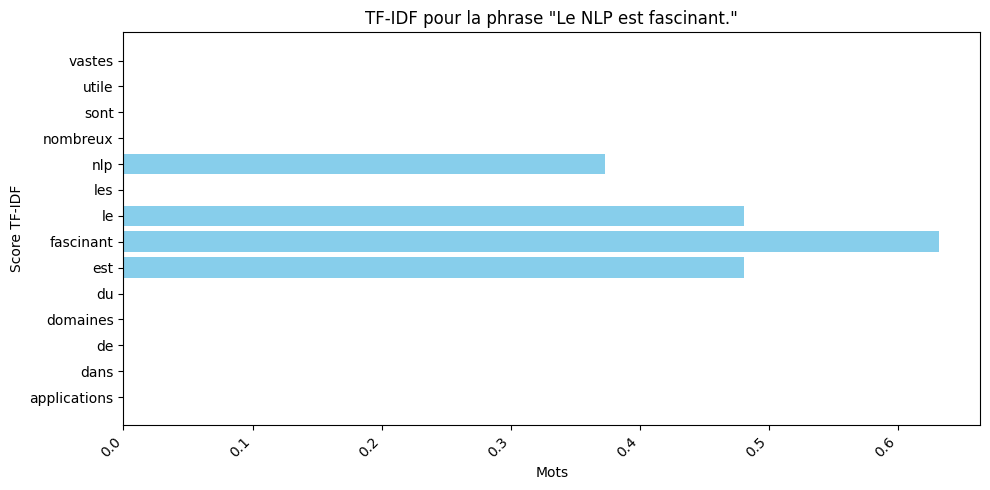

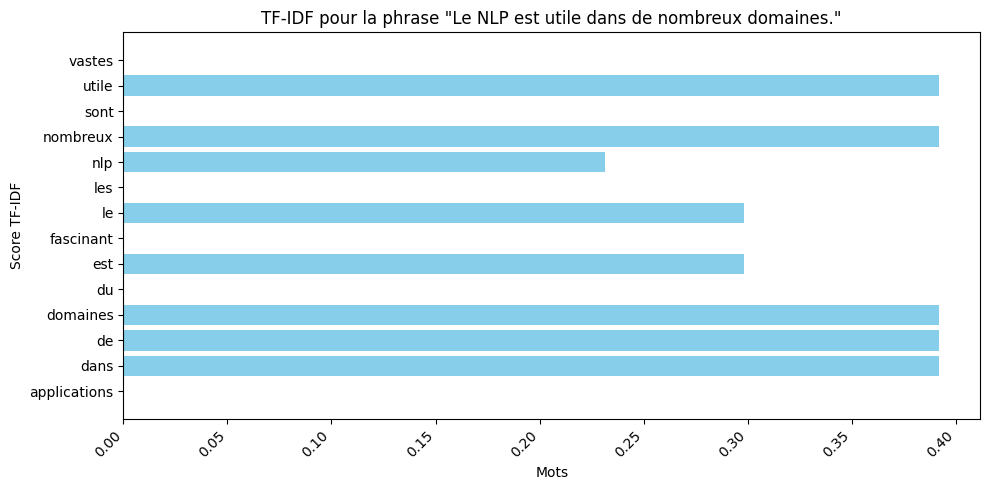

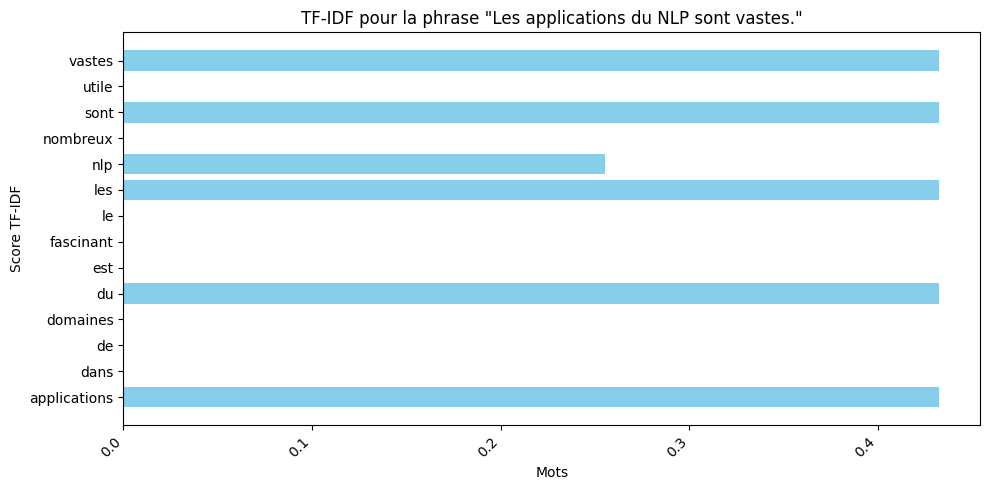

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus de documents (phrases)
corpus = [
    "Le NLP est fascinant.",
    "Le NLP est utile dans de nombreux domaines.",
    "Les applications du NLP sont vastes."
]

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()

# Calculer la matrice TF-IDF
X = vectorizer.fit_transform(corpus)

# Convertir la matrice TF-IDF en DataFrame
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Créer un diagramme en barres pour chaque phrase
for i, phrase in enumerate(corpus):
    plt.figure(figsize=(10, 5))
    plt.barh(df.columns, df.iloc[i], color='skyblue')
    plt.xlabel('Mots')
    plt.ylabel('Score TF-IDF')
    plt.title(f'TF-IDF pour la phrase "{phrase}"')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

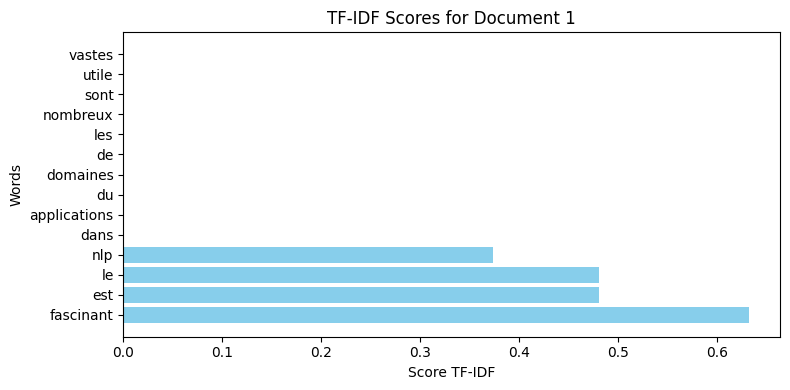

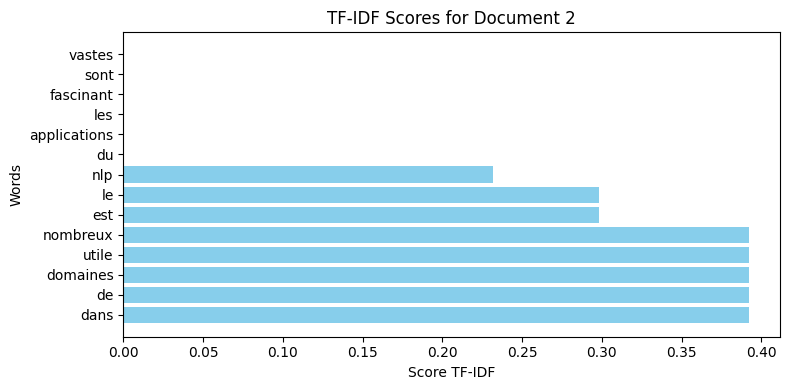

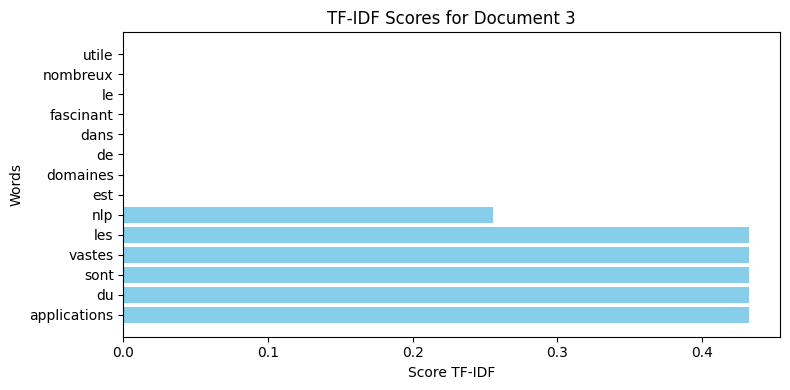

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus de documents
corpus = [
    "Le NLP est fascinant.",
    "Le NLP est utile dans de nombreux domaines.",
    "Les applications du NLP sont vastes."
]

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()

# Calculer la matrice TF-IDF
X = vectorizer.fit_transform(corpus)

# Convertir la matrice TF-IDF en DataFrame
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Boucle sur chaque document pour créer un graphique à barres horizontales
for i in range(len(corpus)):
    # Obtenir les scores TF-IDF pour le document actuel
    document_scores = df.iloc[i]

    # Trier les scores par ordre décroissant
    sorted_scores = document_scores.sort_values(ascending=False)

    # Créer le graphique à barres horizontales
    plt.figure(figsize=(8, 4))  # Ajuster la taille si nécessaire
    plt.barh(sorted_scores.index, sorted_scores.values, color='skyblue')
    plt.title(f"TF-IDF Scores for Document {i + 1}")
    plt.xlabel("Score TF-IDF")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.corpus import stopwords

# Téléchargement des stopwords en français
nltk.download('stopwords')
stop_words = set(stopwords.words('french')) # Liste des stopwords en français

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 2 corpus : avis positifs et négatifs
corpus_pos = [ "L’UE défendra son économie si Washington ne s’éloigne pas de sa politique tarifaire, promet le commissaire à l’économie, Nous sommes prêts à travailler avec les Etats-Unis et à trouver des solutions constructives, acceptables pour tous, a déclaré vendredi le commissaire européen à l’économie, Valdis Dombrovskis.",
"Mais nous faisons aussi passer un message : si nous ne voyons pas de changement du côté américain, de volonté de s’éloigner de leur politique tarifaire, nous devrons défendre notre économie, a assuré le commissaire letton en ouverture d’une réunion des ministres de l’économie des Vingt sept.", "Très beau scénario, acteurs fantastiques !" ]
corpus_neg = [ "Ce film était une vraie déception, très ennuyeux.", "Histoire banale et sans intérêt.", "Je n'ai pas aimé du tout, une perte de temps." ]

In [ ]:
# Fonction de tokenization basique avec suppression des stopwords
def tokenize(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text) # Supprime la ponctuation
  tokens = text.split()
  return [word for word in tokens if word not in stop_words] # Supprime les stopwords

# Tokenisation des corpus
tokens_pos = [token for text in corpus_pos for token in tokenize(text)]
tokens_neg = [token for text in corpus_neg for token in tokenize(text)]

# Comptage des mots
freq_pos = Counter(tokens_pos)
freq_neg = Counter(tokens_neg)

In [ ]:
# Fusion des vocabulaires
all_words = set(freq_pos.keys()).union(set(freq_neg.keys()))

# Calcul des probabilités avec lissage Laplacien (+1)
def word_probabilities(freq, total_count, vocab_size):
  return {word: (freq[word] + 1) / (total_count + vocab_size) for word in all_words}

# Calcul des statistiques
total_pos = sum(freq_pos.values())
total_neg = sum(freq_neg.values())
vocab_size = len(all_words)

p_w = word_probabilities(freq_pos, total_pos, vocab_size)
q_w = word_probabilities(freq_neg, total_neg, vocab_size)

In [ ]:
# Calcul du Log Odds Ratio

lor = {word: np.log(p_w[word]) - np.log(q_w[word]) for word in all_words}

# Trier les mots les plus discriminants
sorted_lor = sorted(lor.items(), key=lambda x: x[1], reverse=True)

# Sélection des **5 mots les plus positifs** et **5 mots les plus négatifs**
top_pos_words = sorted_lor[:5] # Les mots avec le LOR le plus grand (favorables)
top_neg_words = sorted_lor[-5:] # Les mots avec le LOR le plus bas (défavorables)

# Fusion des deux listes
top_words = top_pos_words + top_neg_words # Séparer les mots et leurs scores
words, scores = zip(*top_words)

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 [Text(-1.5, 0, '−1.5'),
  Text(-1.0, 0, '−1.0'),
  Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5')])

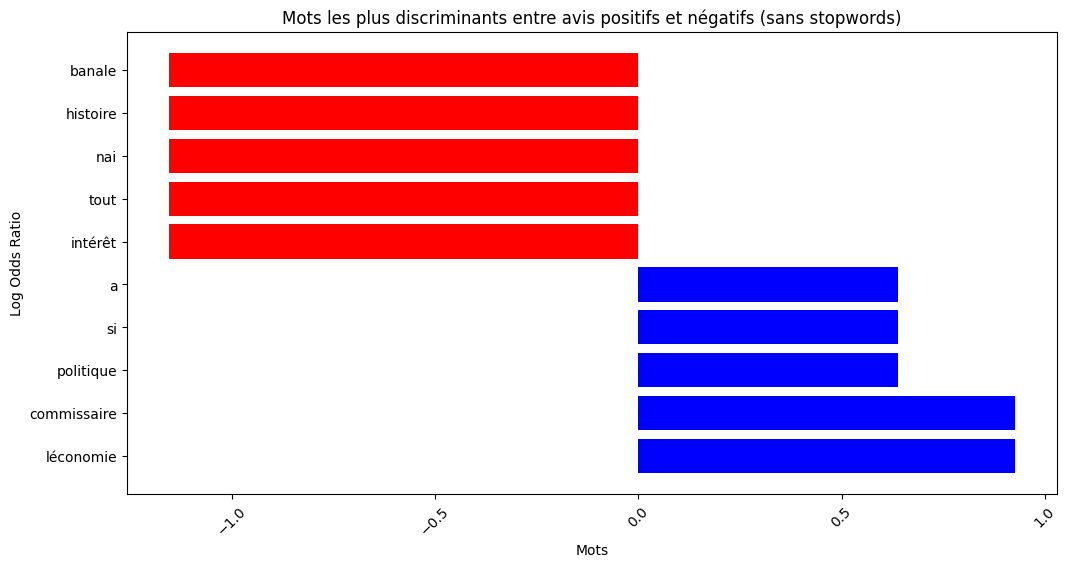

In [ ]:
# Déterminer les couleurs (bleu pour positif, rouge pour négatif)
colors = ['blue' if score > 0 else 'red' for score in scores]

# Création du graphique en barres
plt.figure(figsize=(12, 6))
plt.barh(words, scores, color=colors)
plt.xlabel("Mots")
plt.ylabel("Log Odds Ratio")
plt.title("Mots les plus discriminants entre avis positifs et négatifs (sans stopwords)")
plt.xticks(rotation=45)
# plt.axhline(0, color='black', linewidth=1) # Ligne séparatrice entre positif et négatif plt.show()

In [ ]:
!pip install pandas

In [ ]:
data = pd.read_csv('mnist_test.csv')
data = pd.read_csv('inaug.csv', encoding='ISO-8859-1', sep=';')



In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import io

# 1. Acquisition des données
# Utilisez le nom du fichier que vous avez téléchargé
data = pd.read_csv('inaug.csv', encoding='ISO-8859-1', sep=';')
# 2. Prétraitement des données
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

data['cleaned_speeches'] = data['Speech'].apply(preprocess_text)

# 3. Analyse de sentiment et tonalité
analyzer = SentimentIntensityAnalyzer()
data['sentiment'] = data['Speech'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# 4. Occurrence et TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['cleaned_speeches'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 5. Visualisation des résultats
# Répartition des sentiments
plt.figure(figsize=(10, 5))
plt.hist(data['sentiment'], bins=20)
plt.title('Répartition des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Fréquence')
plt.show()

# Nuage de mots (mots les plus fréquents)
text = " ".join(data['cleaned_speeches'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Graphique en barres (TF-IDF)
tfidf_means = tfidf_df.mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.bar(tfidf_means.index, tfidf_means.values)
plt.title('Mots les plus significatifs (TF-IDF)')
plt.xlabel('Mots')
plt.ylabel('Score TF-IDF moyen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Interprétation et recommandations
# ... (votre analyse et vos recommandations ici)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


KeyError: 'Speech'

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install nltk
!pip install scikit-learn
!pip install textblob
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.8 MB/s eta 0:00:00


In [ ]:
# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter

# Téléchargement des ressources NLTK
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

#####  HEAD  #####


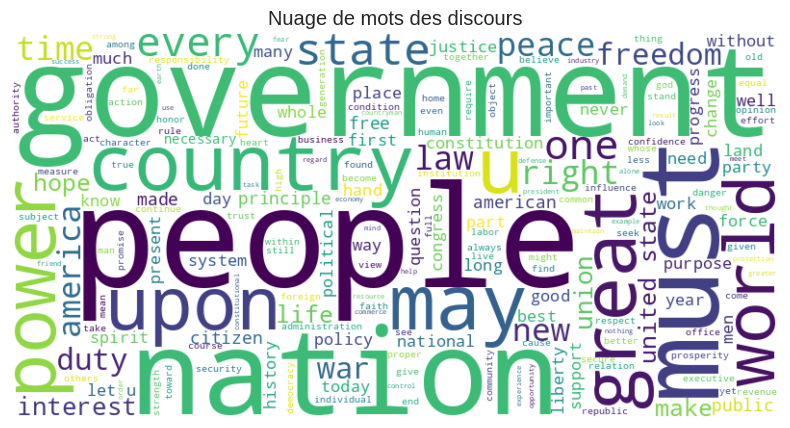

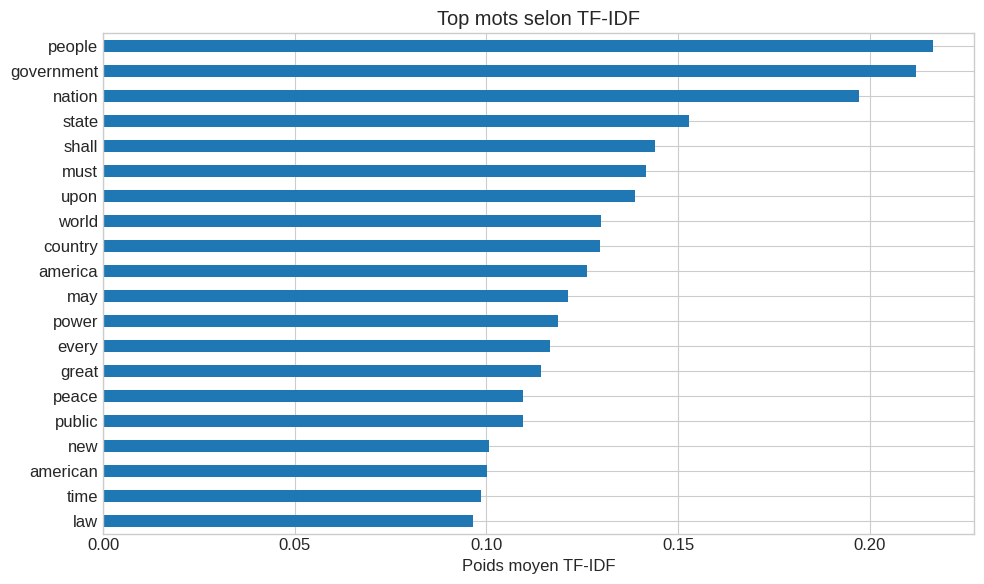

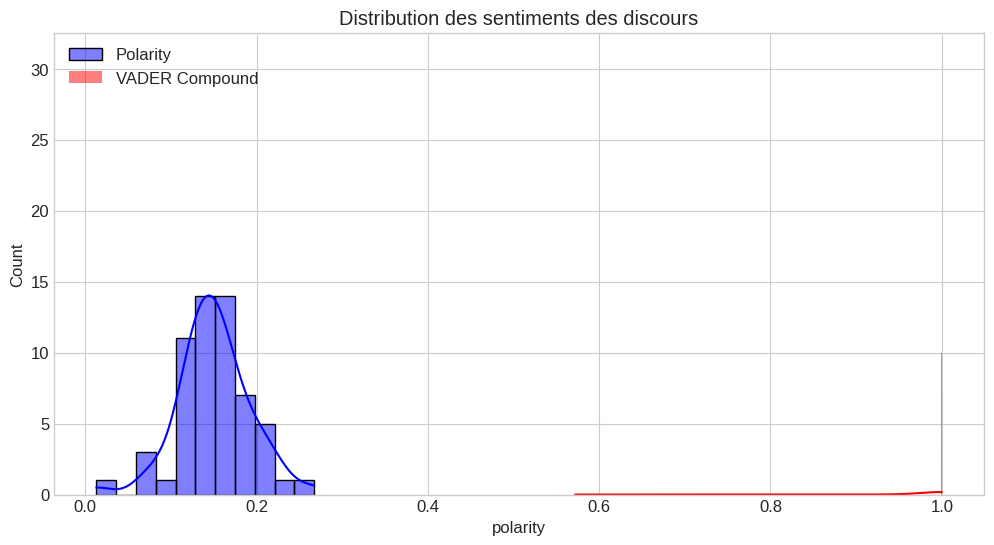

Nombre total de discours : 58
Moyenne de la polarité (TextBlob) : 0.15008118285001537
Moyenne de la tonalité (VADER) : 0.9901086206896551


In [ ]:
# 📥 1. Chargement du fichier CSV brut
raw_df = pd.read_csv('inaug.csv', encoding='ISO-8859-1', sep=',')


# 🛠️ 2. Reconstitution des colonnes principales
# On suppose que les vraies colonnes sont : Name, Title, Date, text
raw_df.columns = ['index', 'Name', 'Title', 'Date'] + [f"text_part_{i}" for i in range(raw_df.shape[1] - 4)]

# Combine toutes les colonnes de texte en une seule colonne 'text'
raw_df['text'] = raw_df[[col for col in raw_df.columns if col.startswith('text_part_')]].apply(
    lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# 🔍 3. Nettoyage de base
df = raw_df[['Name', 'Title', 'Date', 'text']].copy()
print("#####  HEAD  #####")
df.head()
df.dropna(subset=['text'], inplace=True)
df['text'] = df['text'].str.lower()


# 🧹 4. Prétraitement du texte
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess)

# 😃 5. Analyse de sentiment
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

analyzer = SentimentIntensityAnalyzer()
df['vader_sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# 📊 6. WordCloud (nuage de mots)
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)

wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des discours")
plt.show()

# 🧠 7. TF-IDF
tfidf = TfidfVectorizer(max_features=50)
X = tfidf.fit_transform(df['cleaned_text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
tfidf_means = tfidf_df.mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
tfidf_means.plot(kind='barh')
plt.title("Top mots selon TF-IDF")
plt.gca().invert_yaxis()
plt.xlabel("Poids moyen TF-IDF")
plt.tight_layout()
plt.show()

# 📈 8. Sentiments sur tous les discours
plt.figure(figsize=(12, 6))
sns.histplot(df['polarity'], kde=True, color='blue', label='Polarity')
sns.histplot(df['vader_sentiment'], kde=True, color='red', label='VADER Compound')
plt.legend()
plt.title("Distribution des sentiments des discours")
plt.show()

# 🧾 9. Résumé
print("Nombre total de discours :", len(df))
print("Moyenne de la polarité (TextBlob) :", df['polarity'].mean())
print("Moyenne de la tonalité (VADER) :", df['vader_sentiment'].mean())


In [ ]:
# 2. Reconstitution des colonnes principales
raw_df.columns = ['index', 'Name', 'Title', 'Date'] + [f"text_part_{i}" for i in range(raw_df.shape[1] - 4)]
raw_df['text'] = raw_df[[col for col in raw_df.columns if col.startswith('text_part_')]].apply(
    lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# 3. Nettoyage de base
df = raw_df[['Name', 'Title', 'Date', 'text']].copy()
df.dropna(subset=['text'], inplace=True)
df['text'] = df['text'].str.lower()

# 4. Prétraitement du texte
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess)

# 5. Analyse de sentiment
analyzer = SentimentIntensityAnalyzer()
df['vader_sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Afficher les scores de sentiment pour chaque discours
for index, row in df.iterrows():
    print(f"Discours : {row['Title']} ({row['Date']})")
    print(f"Score de sentiment (VADER) : {row['vader_sentiment']:.4f}")
    print("-" * 40)

Discours : First Inaugural Address (Thursday, April 30, 1789)
Score de sentiment (VADER) : 0.9999
----------------------------------------
Discours : Second Inaugural Address (Monday, March 4, 1793)
Score de sentiment (VADER) : 0.8126
----------------------------------------
Discours : Inaugural Address (Saturday, March 4, 1797)
Score de sentiment (VADER) : 1.0000
----------------------------------------
Discours : First Inaugural Address (Wednesday, March 4, 1801)
Score de sentiment (VADER) : 0.9999
----------------------------------------
Discours : Second Inaugural Address (Monday, March 4, 1805)
Score de sentiment (VADER) : 0.9999
----------------------------------------
Discours : First Inaugural Address (Saturday, March 4, 1809)
Score de sentiment (VADER) : 0.9999
----------------------------------------
Discours : Second Inaugural Address (Thursday, March 4, 1813)
Score de sentiment (VADER) : 0.9810
----------------------------------------
Discours : First Inaugural Address (Tue

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('inaug.csv', encoding='ISO-8859-1', sep=',')  # Try comma
    print("File read successfully with comma delimiter!")
except Exception as e:
    try:
        data = pd.read_csv('inaug.csv', encoding='ISO-8859-1', sep='\t')  # Try tab
        print("File read successfully with tab delimiter!")
    except Exception as e2:
        try:
            data = pd.read_csv('inaug.csv', encoding='ISO-8859-1', sep=' ')  # Try space
            print("File read successfully with space delimiter!")
        except Exception as e3:
            print(f"Error reading file: {e3}")

File read successfully with comma delimiter!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Données chargées avec succès.
   Unnamed: 0               Name         Inaugural Address  \
0           4  George Washington   First Inaugural Address   
1           5  George Washington  Second Inaugural Address   
2           6         John Adams         Inaugural Address   
3           7   Thomas Jefferson   First Inaugural Address   
4           8   Thomas Jefferson  Second Inaugural Address   

                       Date                                               text  
0  Thursday, April 30, 1789             Fellow-Citizens of the Senate and o...  
1     Monday, March 4, 1793              Fellow Citizens:    I AM again cal...  
2   Saturday, March 4, 1797                WHEN it was first perceived, in ...  
3  Wednesday, March 4, 1801              Friends and Fellow-Citizens:    CA...  
4     Monday, March 4, 1805                PROCEEDING, fellow-citizens, to ...  

Tokenisation effectuée.
                                              tokens
0  [fellowcitizens, of, the, sena

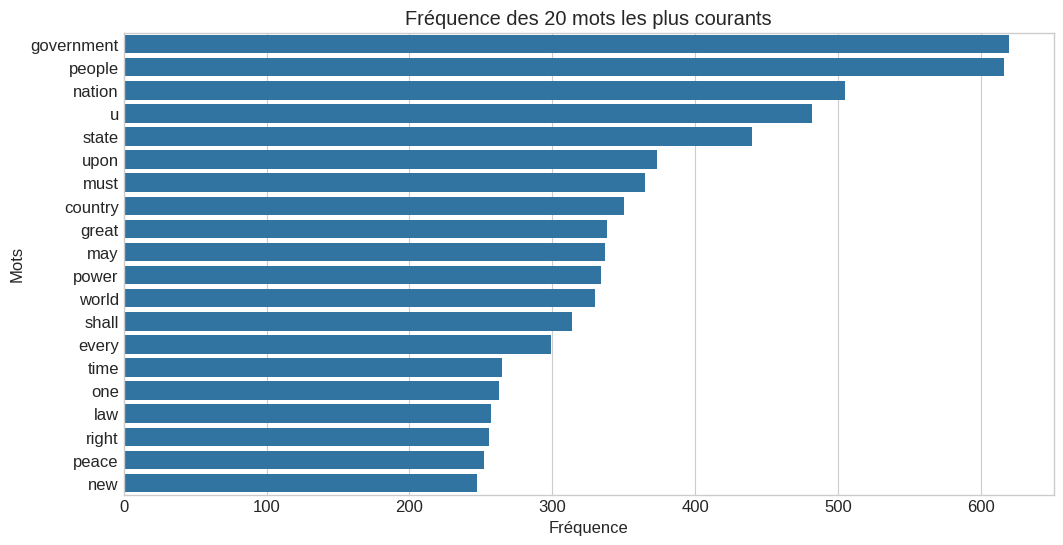

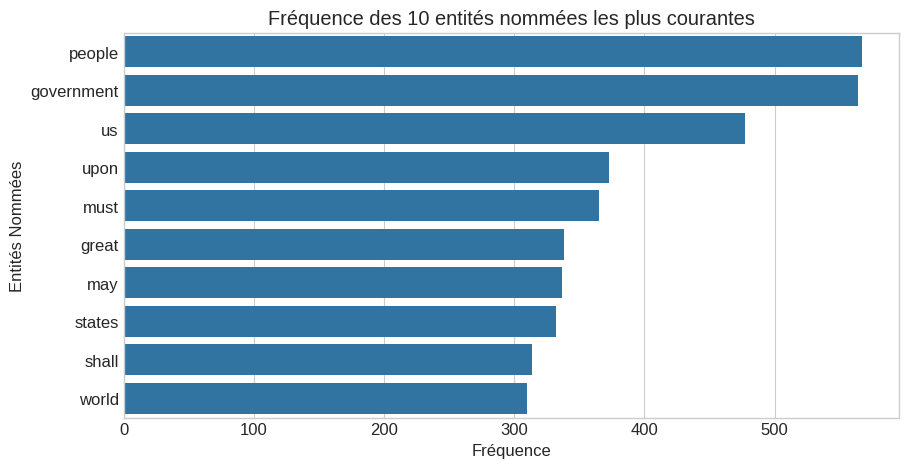

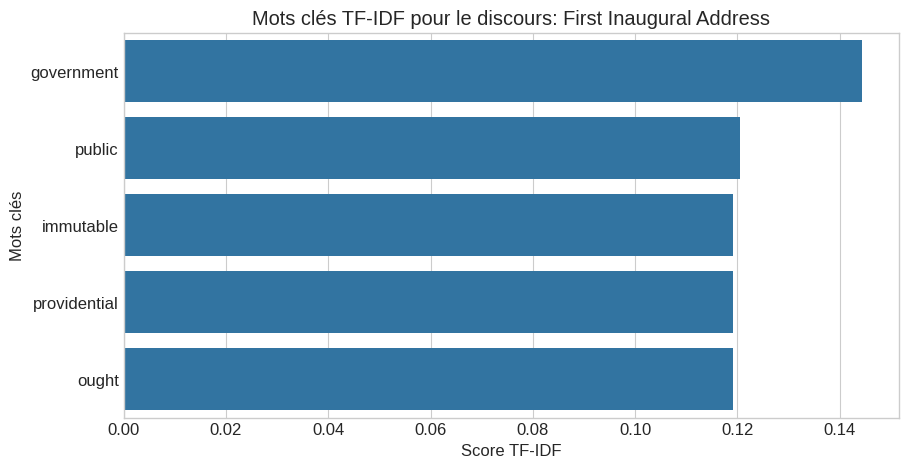

In [28]:

# ## 1. Acquisition des Données (1 point)

# Importer les librairies nécessaires
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag, ne_chunk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Téléchargement des ressources NLTK (à exécuter une seule fois)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Charger les données depuis le fichier CSV (remplacez 'your_file.csv' par le nom de votre fichier)
try:
    df = pd.read_csv('inaug.csv', encoding='ISO-8859-1', sep=',')
    print("Données chargées avec succès.")
    # Afficher les premières lignes pour inspection
    print(df.head())
except FileNotFoundError:
    print("Erreur: Le fichier CSV n'a pas été trouvé. Veuillez vérifier le chemin du fichier.")
    # Gérer le cas où le fichier n'est pas trouvé
    df = None

if df is not None:
    # Identifier la colonne contenant le texte des discours (modifiez 'text' si nécessaire)
    speech_column = 'text'
    if speech_column not in df.columns:
        print(f"Erreur: La colonne '{speech_column}' n'existe pas dans le DataFrame.")
        df = None

if df is not None:
    # ## 2. Prétraitement des Données (4 points)

    # ### 2.1 Tokenisation correcte des discours (1 point)
    def tokenize_text(text):
        if isinstance(text, str):
            # Supprimer les caractères non-alphanumériques et convertir en minuscules
            text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
            return nltk.word_tokenize(text)
        return []

    df['tokens'] = df[speech_column].apply(tokenize_text)
    print("\nTokenisation effectuée.")
    print(df[['tokens']].head())

# ### 2.2 Nettoyage des données (suppression des valeurs manquantes, correction des erreurs, stop words...) (1 point)
    # Suppression des valeurs manquantes (si nécessaire)
    df.dropna(subset=[speech_column], inplace=True)
    df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token.isalpha()])

    # Suppression des stop words (en anglais car les discours sont en anglais)
    stop_words_en = set(stopwords.words('english'))
    df['tokens_cleaned'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words_en])
    print("\nNettoyage des données effectué (suppression des valeurs manquantes et des stop words).")
    print(df[['tokens', 'tokens_cleaned']].head())

    # ### 2.3 Application de la lemmatisation / stemming (1 point)
    lemmatizer = WordNetLemmatizer()
    def lemmatize_tokens(tokens):
        return [lemmatizer.lemmatize(token) for token in tokens]

    # Alternativement, utiliser le stemming
    # stemmer_en = SnowballStemmer('english')
    # def stem_tokens(tokens):
    #     return [stemmer_en.stem(token) for token in tokens]

    df['tokens_lemmatized'] = df['tokens_cleaned'].apply(lemmatize_tokens) # Utiliser la lemmatisation
    # df['tokens_stemmed'] = df['tokens_cleaned'].apply(stem_tokens) # Décommenter pour utiliser le stemming
    print("\nLemmatisation effectuée.")
    print(df[['tokens_cleaned', 'tokens_lemmatized']].head())

    # ### 2.4 NER et/ou POS (1 point)
    def perform_ner(tokens):
        tagged_tokens = pos_tag(tokens)
        ner_tree = ne_chunk(tagged_tokens, binary=True) # binary=True pour simplifier à ENTITY/O
        return [(word, tag) for word, tag in ner_tree.leaves() if tag != 'O']

    df['ner_entities'] = df['tokens_cleaned'].apply(perform_ner)
    print("\nNER effectué (entités nommées simplifiées).")
    print(df[['tokens_cleaned', 'ner_entities']].head())

    def perform_pos(tokens):
        return pos_tag(tokens)

    df['pos_tags'] = df['tokens_cleaned'].apply(perform_pos)
    print("\nPOS tagging effectué.")
    print(df[['tokens_cleaned', 'pos_tags']].head())

    # ### Préparation du texte prétraité pour les analyses suivantes
    df['processed_text'] = df['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))

    # ## 3. Analyses de base (3 points)

    # ### 3.1 Fréquence des mots
    all_words = [word for tokens in df['tokens_lemmatized'] for word in tokens]
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    print("\nLes 20 mots les plus fréquents :")
    print(most_common_words)

    # ### 3.2 Fréquence des entités nommées
    all_entities = [entity for sublist in df['ner_entities'] for entity, tag in sublist]
    entity_counts = Counter(all_entities)
    most_common_entities = entity_counts.most_common(10)
    print("\nLes 10 entités nommées les plus fréquentes :")
    print(most_common_entities)

    # ## 4. Analyses avancées (4 points)

    # ### 4.1 TF-IDF et Mots Clés
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    def get_top_keywords(row, n=5):
        top_n_indices = row.argsort()[-n:][::-1]
        return [feature_names[i] for i in top_n_indices]

    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    df['keywords'] = tfidf_df.apply(get_top_keywords, axis=1)
    print("\nMots clés TF-IDF pour quelques discours :")
    print(df[['Inaugural Address', 'keywords']].head())

    # ### 4.2 Modélisation de sujets (Topic Modeling) - Latent Dirichlet Allocation (LDA)
    num_topics = 3 # Ajustez le nombre de sujets selon votre intuition
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(tfidf_matrix)

    def display_topics(model, feature_names, num_top_words=10):
        print(f"\nTopiques identifiés par LDA ({num_topics} topiques):")
        for topic_idx, topic in enumerate(model.components_):
            print(f"Topic #{topic_idx}:")
            print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

    display_topics(lda_model, feature_names)

    # ## 5. Visualisation des Résultats (4 points)

    # ### 5.1 Visualisation de la fréquence des mots
    plt.figure(figsize=(12, 6))
    sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words])
    plt.title('Fréquence des 20 mots les plus courants')
    plt.xlabel('Fréquence')
    plt.ylabel('Mots')
    plt.show()

    # ### 5.2 Visualisation de la fréquence des entités nommées
    plt.figure(figsize=(10, 5))
    sns.barplot(x=[count for entity, count in most_common_entities], y=[entity for entity, count in most_common_entities])
    plt.title('Fréquence des 10 entités nommées les plus courantes')
    plt.xlabel('Fréquence')
    plt.ylabel('Entités Nommées')
    plt.show()

    # ### 5.3 Visualisation des mots clés TF-IDF (pour un discours)
    sample_speech_index = 0 # Index du premier discours
    keywords_sample = df['keywords'].iloc[sample_speech_index]
    tfidf_values_sample = tfidf_df.iloc[sample_speech_index][keywords_sample].sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=tfidf_values_sample.values, y=tfidf_values_sample.index)
    plt.title(f'Mots clés TF-IDF pour le discours: {df["Inaugural Address"].iloc[sample_speech_index]}')
    plt.xlabel('Score TF-IDF')
    plt.ylabel('Mots clés')
    plt.show()

    # ## 6. Interprétation et Recommandations (4 points)


